In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.metrics import confusion_matrix

from tensorflow.keras import datasets

In [131]:
df = pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')

In [132]:
df.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df.shape

(1493, 301)

In [133]:
df['LABEL']

0       politics
1       politics
2       politics
3       politics
4       politics
          ...   
1488     science
1489     science
1490     science
1491     science
1492     science
Name: LABEL, Length: 1493, dtype: object

In [134]:
df['LABEL'].unique()

array(['politics', 'football', 'science'], dtype=object)

### ANN

In [135]:
X = np.array(df.iloc[:,1:])
y = np.array(df['LABEL'])

In [136]:
label_dict = {'politics':0,'football':1,'science':2}

In [137]:
y = np.array([label_dict[i] for i in y])

In [86]:
Y = []
for k in y:
    Y.append([1 if i == k else 0 for i in range(0,3)])
Y = np.array(Y)

In [87]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(1119, 300)
(374, 300)
1119
374


In [89]:
### Creating the ANN instance
ANN = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu',input_shape = (300,)), # Dense layer 1
  tf.keras.layers.Dropout(0.2), # Drop out layer
  tf.keras.layers.Dense(64, activation='relu'),# Dense layer 2
  tf.keras.layers.Dropout(0.1), # Dropout layer
  tf.keras.layers.Dense(3, activation='softmax') # Final output layer with softmax
])

In [90]:
ANN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               38528     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                                 
Total params: 46979 (183.51 KB)
Trainable params: 46979 (183.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
#Compiling the model
ANN.compile(loss="categorical_crossentropy", #loss as categorical cross entropy
            metrics=["accuracy"],
            optimizer='adam')

In [92]:
#Fitting the model
Hist=ANN.fit(X_train,y_train, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
35/35 [==============================] - 0s 2ms/step - loss: 1.0442 - accuracy: 0.4352 - val_loss: 0.9596 - val_accuracy: 0.5856
Epoch 2/30
35/35 [==============================] - 0s 829us/step - loss: 0.8644 - accuracy: 0.6667 - val_loss: 0.7779 - val_accuracy: 0.7353
Epoch 3/30
35/35 [==============================] - 0s 839us/step - loss: 0.6541 - accuracy: 0.7632 - val_loss: 0.6304 - val_accuracy: 0.7647
Epoch 4/30
35/35 [==============================] - 0s 839us/step - loss: 0.5082 - accuracy: 0.7900 - val_loss: 0.5860 - val_accuracy: 0.7727
Epoch 5/30
35/35 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8293 - val_loss: 0.5958 - val_accuracy: 0.7620
Epoch 6/30
35/35 [==============================] - 0s 874us/step - loss: 0.3524 - accuracy: 0.8552 - val_loss: 0.6225 - val_accuracy: 0.7567
Epoch 7/30
35/35 [==============================] - 0s 849us/step - loss: 0.3116 - accuracy: 0.8820 - val_loss: 0.6676 - val_accuracy: 0.7620
Epoch 8/30

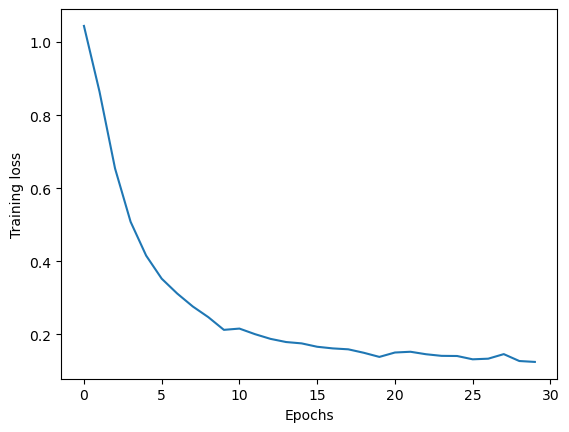

In [93]:
#Loss over time
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

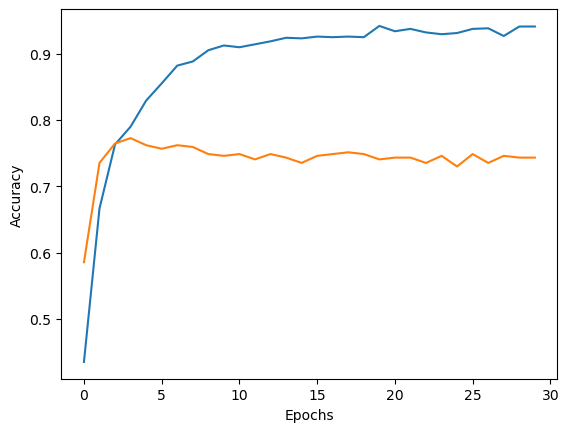

In [94]:
# Accuracy of training and testing sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [95]:
##Predicting on test set
y_pred = ANN.predict(X_test)

y_pred = np.array([np.argmax(i) for i in y_pred])
Y_test = np.array([np.argmax(i) for i in y_test])

12/12 [==============================] - 0s 499us/step


In [96]:
inv_label_dict = {0:'politics',1:'football',2:'science'}

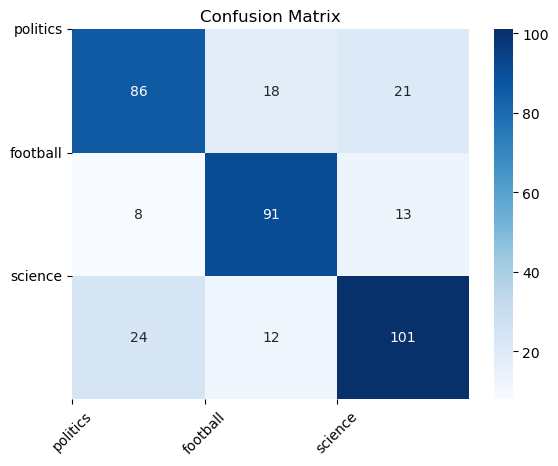

In [97]:
cm = confusion_matrix(Y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.xticks(list(inv_label_dict.keys()),labels = list(inv_label_dict.values()),
           rotation = 45)
plt.yticks(list(inv_label_dict.keys()),labels = list(inv_label_dict.values()),rotation = 0)

plt.title("Confusion Matrix")
plt.show()

### CNN

In [98]:
### Creating the ANN instance
CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 3, input_shape = (300,1),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Conv1D(32,3,padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Flatten(), # Flatten Layer
    tf.keras.layers.Dropout(0.2), # Drop out layer
    tf.keras.layers.Dense(64, activation='relu'),# Dense layer 2
    tf.keras.layers.Dropout(0.1), # Dropout layer
    tf.keras.layers.Dense(3, activation='softmax') # Final output layer with softmax
])

In [99]:
CNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 300, 64)           256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 150, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 150, 32)           6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 75, 32)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2400)              0         
                                                                 
 dropout_12 (Dropout)        (None, 2400)             

In [100]:
#Compiling the model
CNN.compile(loss="categorical_crossentropy", #loss as categorical cross entropy
            metrics=["accuracy"],
            optimizer='adam')

In [102]:
#Fitting the model
Hist=CNN.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1),y_train, epochs=30,
             validation_data=(X_test.reshape(X_test.shape[0],X_test.shape[1],1), y_test))

Epoch 1/30
35/35 [==============================] - 0s 5ms/step - loss: 0.9576 - accuracy: 0.5290 - val_loss: 0.7635 - val_accuracy: 0.6818
Epoch 2/30
35/35 [==============================] - 0s 4ms/step - loss: 0.7214 - accuracy: 0.6801 - val_loss: 0.6765 - val_accuracy: 0.7193
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.7426 - val_loss: 0.6359 - val_accuracy: 0.7513
Epoch 4/30
35/35 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7793 - val_loss: 0.6441 - val_accuracy: 0.7433
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.8061 - val_loss: 0.6678 - val_accuracy: 0.7433
Epoch 6/30
35/35 [==============================] - 0s 6ms/step - loss: 0.4071 - accuracy: 0.8275 - val_loss: 0.6771 - val_accuracy: 0.7433
Epoch 7/30
35/35 [==============================] - 0s 5ms/step - loss: 0.3675 - accuracy: 0.8463 - val_loss: 0.7338 - val_accuracy: 0.7433
Epoch 8/30
35/35 [==

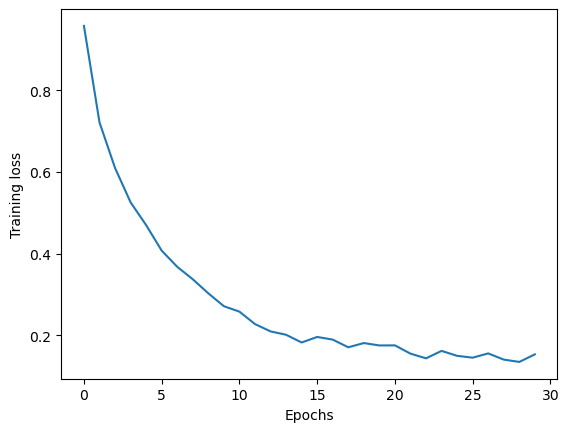

In [103]:
#Loss over time
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

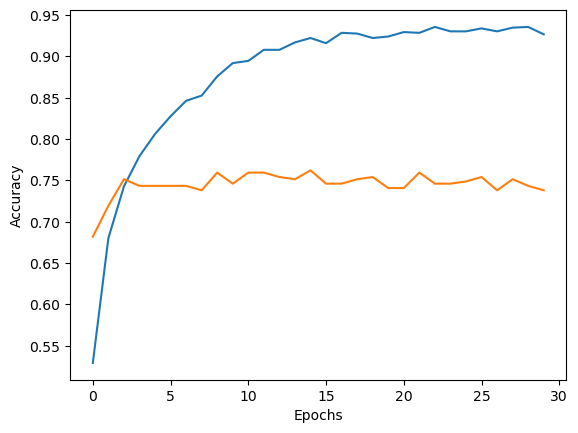

In [104]:
# Accuracy of training and testing sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [105]:
##Predicting on test set
y_pred = CNN.predict(X_test)

y_pred = np.array([np.argmax(i) for i in y_pred])
Y_test = np.array([np.argmax(i) for i in y_test])

12/12 [==============================] - 0s 1ms/step


In [106]:
inv_label_dict = {0:'politics',1:'football',2:'science'}

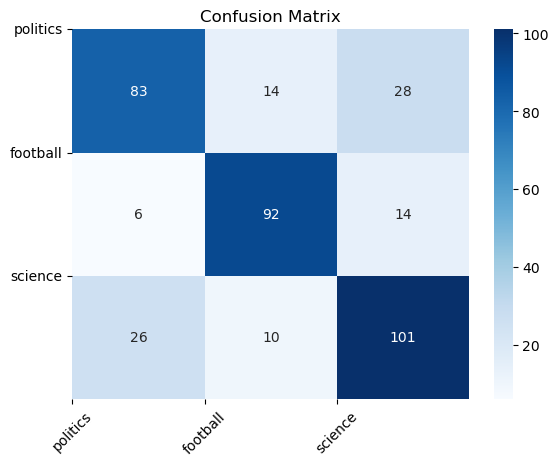

In [107]:
cm = confusion_matrix(Y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.xticks(list(inv_label_dict.keys()),labels = list(inv_label_dict.values()),
           rotation = 45)
plt.yticks(list(inv_label_dict.keys()),labels = list(inv_label_dict.values()),rotation = 0)

plt.title("Confusion Matrix")
plt.show()

### LSTM RNN

In [121]:
LSTM = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, input_shape = (300,1)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [122]:
LSTM.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 3)                 99        
                                                                 
Total params: 19075 (74.51 KB)
Trainable params: 19075 (74.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
#Compiling the model
LSTM.compile(loss="categorical_crossentropy", #loss as categorical cross entropy
            metrics=["accuracy"],
            optimizer='adam')

In [124]:
#Fitting the model
Hist=LSTM.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1),y_train, epochs=30,
             validation_data=(X_test.reshape(X_test.shape[0],X_test.shape[1],1), y_test))

Epoch 1/30
35/35 [==============================] - 2s 46ms/step - loss: 1.0980 - accuracy: 0.3369 - val_loss: 1.0929 - val_accuracy: 0.3797
Epoch 2/30
35/35 [==============================] - 1s 41ms/step - loss: 1.1017 - accuracy: 0.3709 - val_loss: 1.0955 - val_accuracy: 0.3930
Epoch 3/30
35/35 [==============================] - 1s 41ms/step - loss: 1.0968 - accuracy: 0.3521 - val_loss: 1.0942 - val_accuracy: 0.3235
Epoch 4/30
35/35 [==============================] - 1s 41ms/step - loss: 1.0944 - accuracy: 0.3718 - val_loss: 1.0901 - val_accuracy: 0.3342
Epoch 5/30
35/35 [==============================] - 2s 43ms/step - loss: 1.0923 - accuracy: 0.4102 - val_loss: 1.0862 - val_accuracy: 0.4572
Epoch 6/30
35/35 [==============================] - 1s 41ms/step - loss: 1.0896 - accuracy: 0.4093 - val_loss: 1.0827 - val_accuracy: 0.4144
Epoch 7/30
35/35 [==============================] - 1s 43ms/step - loss: 1.0874 - accuracy: 0.4066 - val_loss: 1.0772 - val_accuracy: 0.3877
Epoch 8/30
35

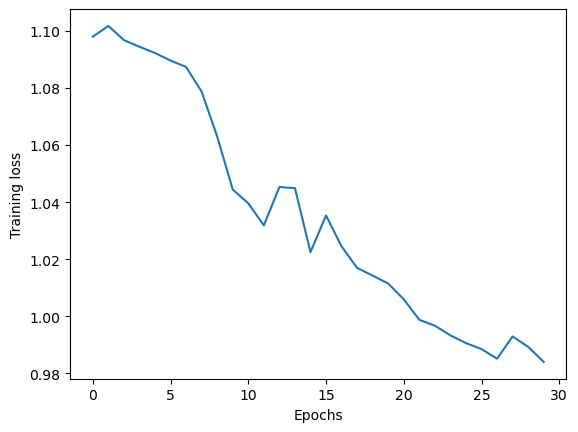

In [125]:
#Loss over time
plt.plot(Hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

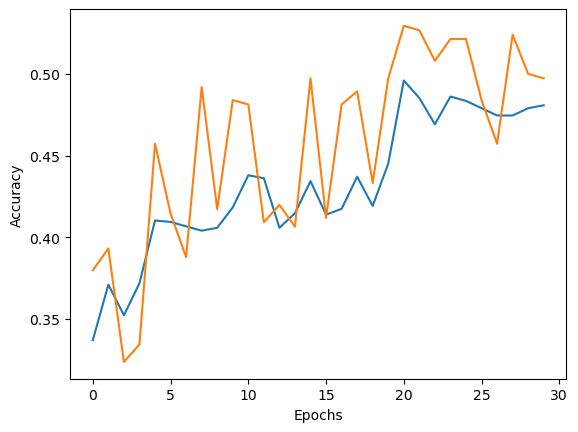

In [126]:
# Accuracy of training and testing sets over epochs
plt.plot(Hist.history['accuracy'],label = 'Training Accuracy')
plt.plot(Hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [127]:
##Predicting on test set
y_pred = LSTM.predict(X_test)

y_pred = np.array([np.argmax(i) for i in y_pred])
Y_test = np.array([np.argmax(i) for i in y_test])

12/12 [==============================] - 0s 10ms/step


In [128]:
inv_label_dict = {0:'politics',1:'football',2:'science'}

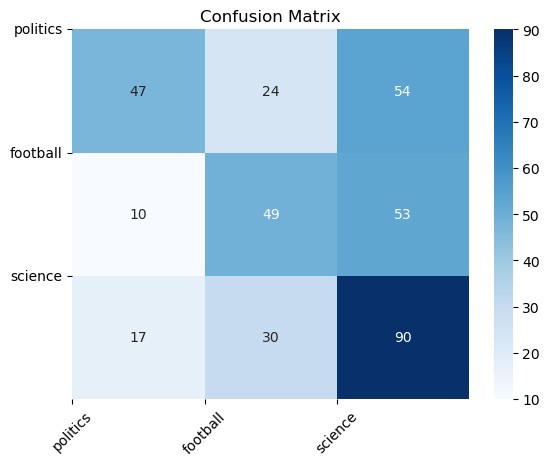

In [129]:
cm = confusion_matrix(Y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues') 
plt.xticks(list(inv_label_dict.keys()),labels = list(inv_label_dict.values()),
           rotation = 45)
plt.yticks(list(inv_label_dict.keys()),labels = list(inv_label_dict.values()),rotation = 0)

plt.title("Confusion Matrix")
plt.show()